**Problem Statement** : To predict the forest cover type from the given cartographic variables.

In [42]:
#importing libraries
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
from scipy.stats import norm 
from matplotlib import cm
import seaborn as sns

In [43]:
#reading data
train_data = pd.read_csv('train.csv')
test_data=pd.read_csv('test.csv')
sample_data = pd.read_csv('sample_submission.csv')

In [44]:
#dimension
train_data.shape

(15120, 56)

The dataset cantains 56 features including target variable cover_type along with 15120 observations.

In [45]:
train_data.head()

,Id,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
0,1,2596,51,3,258,0,510,221,232,148,...,0,0,0,0,0,0,0,0,0,5
1,2,2590,56,2,212,-6,390,220,235,151,...,0,0,0,0,0,0,0,0,0,5
2,3,2804,139,9,268,65,3180,234,238,135,...,0,0,0,0,0,0,0,0,0,2
3,4,2785,155,18,242,118,3090,238,238,122,...,0,0,0,0,0,0,0,0,0,2
4,5,2595,45,2,153,-1,391,220,234,150,...,0,0,0,0,0,0,0,0,0,5


In [46]:
test_data.head()

,Id,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,...,Soil_Type31,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40
0,15121,2680,354,14,0,0,2684,196,214,156,...,0,0,0,0,0,0,0,0,0,0
1,15122,2683,0,13,0,0,2654,201,216,152,...,0,0,0,0,0,0,0,0,0,0
2,15123,2713,16,15,0,0,2980,206,208,137,...,0,0,0,0,0,0,0,0,0,0
3,15124,2709,24,17,0,0,2950,208,201,125,...,0,0,0,0,0,0,0,0,0,0
4,15125,2706,29,19,0,0,2920,210,195,115,...,0,0,0,0,0,0,0,0,0,0


In [47]:
sample_data.head()

,Id,Cover_Type
0,15121,1
1,15122,1
2,15123,1
3,15124,1
4,15125,1


In [48]:
train_data.nunique()

Id                                    15120
Elevation                              1665
Aspect                                  361
Slope                                    52
Horizontal_Distance_To_Hydrology        400
Vertical_Distance_To_Hydrology          423
Horizontal_Distance_To_Roadways        3250
Hillshade_9am                           176
Hillshade_Noon                          141
Hillshade_3pm                           247
Horizontal_Distance_To_Fire_Points     2710
Wilderness_Area1                          2
Wilderness_Area2                          2
Wilderness_Area3                          2
Wilderness_Area4                          2
Soil_Type1                                2
Soil_Type2                                2
Soil_Type3                                2
Soil_Type4                                2
Soil_Type5                                2
Soil_Type6                                2
Soil_Type7                                1
Soil_Type8                      

In [49]:
#checking null values
train_data.isnull().sum()

Id                                    0
Elevation                             0
Aspect                                0
Slope                                 0
Horizontal_Distance_To_Hydrology      0
Vertical_Distance_To_Hydrology        0
Horizontal_Distance_To_Roadways       0
Hillshade_9am                         0
Hillshade_Noon                        0
Hillshade_3pm                         0
Horizontal_Distance_To_Fire_Points    0
Wilderness_Area1                      0
Wilderness_Area2                      0
Wilderness_Area3                      0
Wilderness_Area4                      0
Soil_Type1                            0
Soil_Type2                            0
Soil_Type3                            0
Soil_Type4                            0
Soil_Type5                            0
Soil_Type6                            0
Soil_Type7                            0
Soil_Type8                            0
Soil_Type9                            0
Soil_Type10                           0


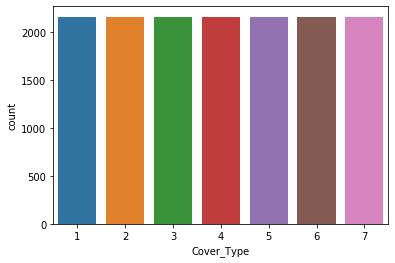

In [50]:
#Forest cover types
sns.countplot(x='Cover_Type',data=train_data)
plt.show()

**Correlation**

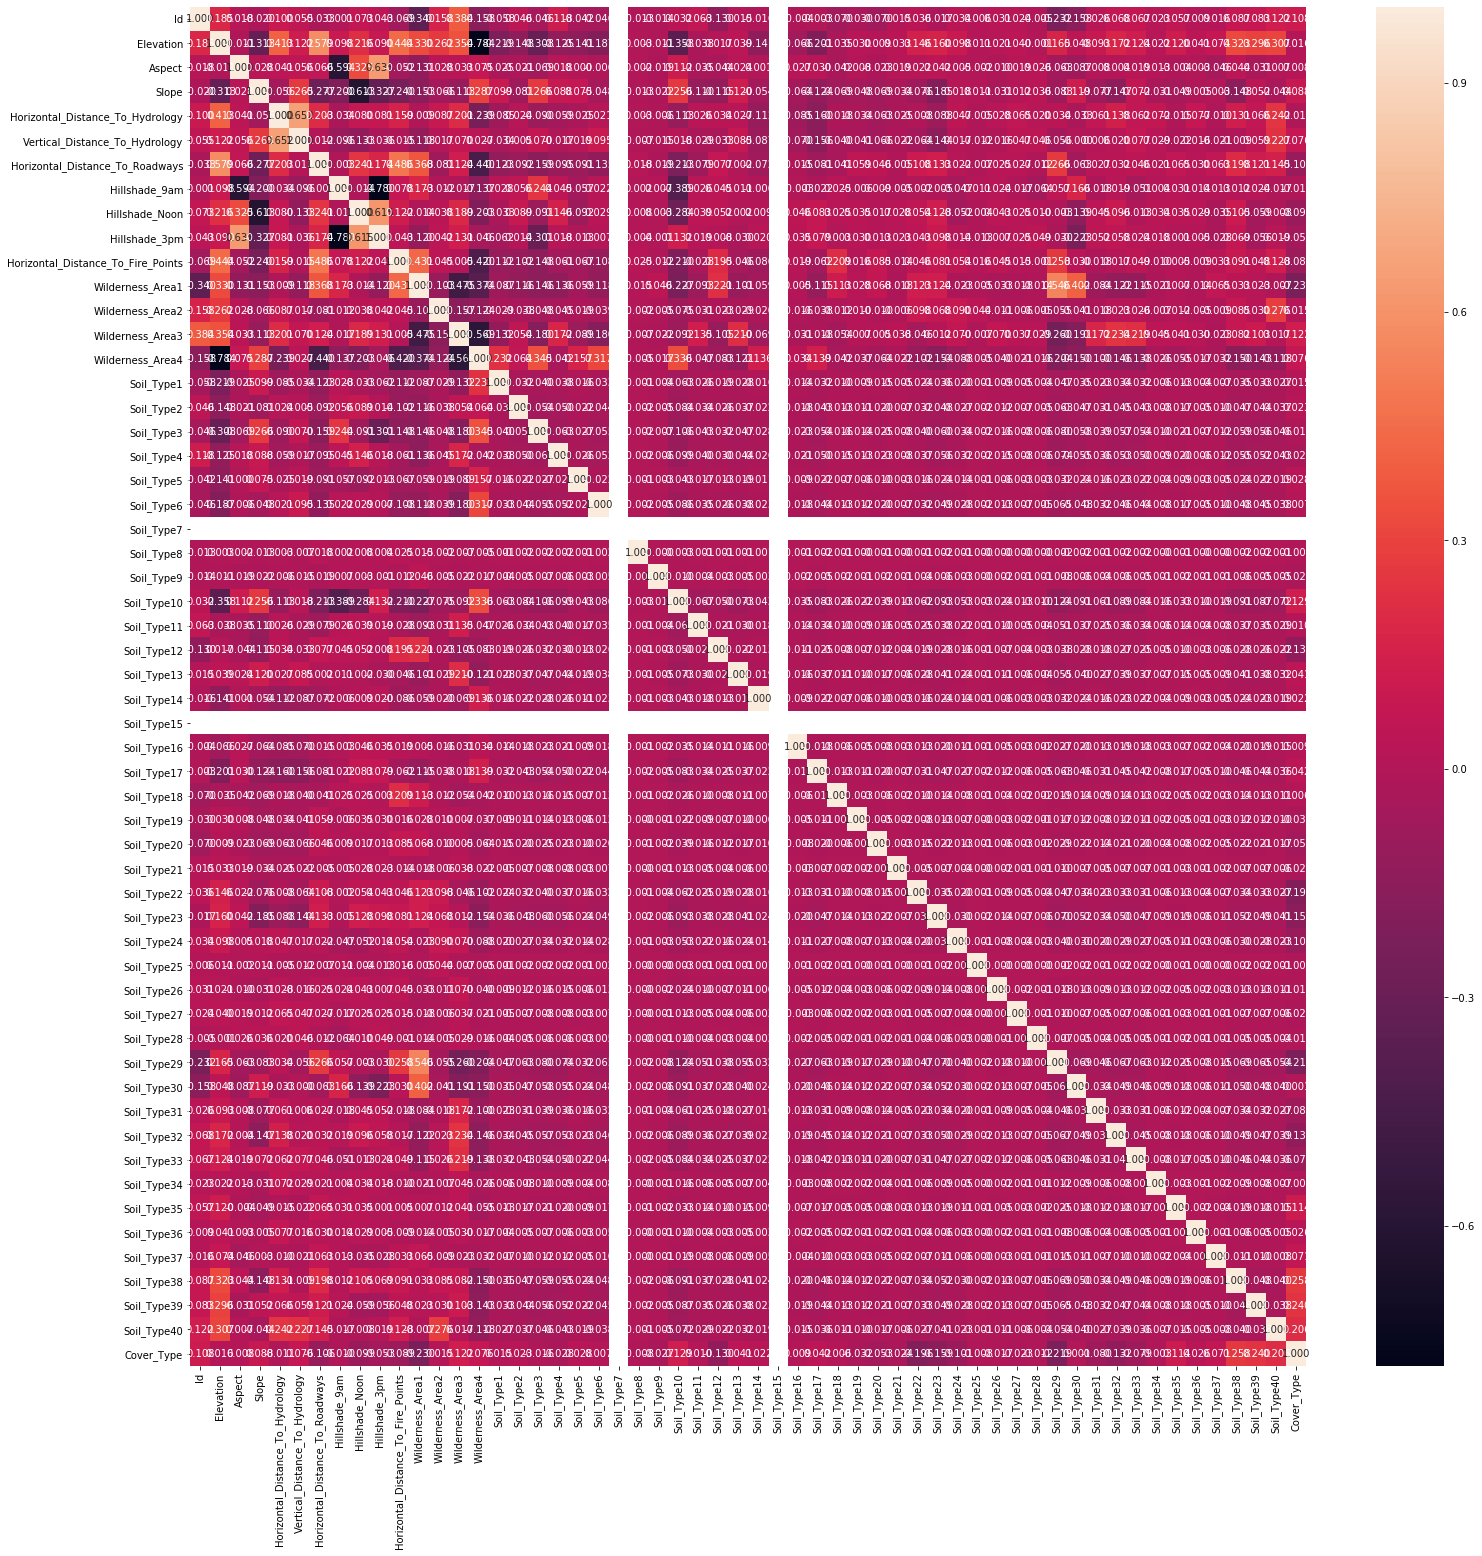

In [51]:
cor=train_data.corr()
fig, ax = plt.subplots(figsize=(25,25))
sns.heatmap(cor,xticklabels=cor.columns,yticklabels=cor.columns,fmt= '.3f',annot=True,ax=ax)

In [52]:
train_data.corr()

,Id,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
Id,1.000000,0.185496,0.017702,-0.020168,0.099637,0.055348,-0.033028,0.000786,0.073123,0.042524,...,0.068048,0.066887,0.022520,0.057480,0.009110,0.016040,0.086932,0.083376,0.122475,0.108363
Elevation,0.185496,1.000000,-0.011096,-0.312640,0.412712,0.122092,0.578659,0.097900,0.215782,0.089518,...,0.172349,0.123821,0.021876,0.120157,0.040571,0.073825,0.323440,0.296405,0.306755,0.016090
Aspect,0.017702,-0.011096,1.000000,0.028148,0.040732,0.056412,0.066184,-0.593997,0.324912,0.635022,...,0.003700,0.018719,0.012927,-0.004235,0.003160,-0.046309,0.043860,-0.031342,0.007208,0.008015
Slope,-0.020168,-0.312640,0.028148,1.000000,-0.055976,0.265314,-0.277049,-0.200072,-0.612613,-0.326887,...,-0.147258,0.072027,-0.030590,-0.048855,-0.004570,0.003129,-0.148342,0.051900,-0.043513,0.087722
Horizontal_Distance_To_Hydrology,0.099637,0.412712,0.040732,-0.055976,1.000000,0.652142,0.203397,-0.033803,0.080047,0.080833,...,0.138275,0.062121,0.072485,-0.015446,0.077251,-0.009549,0.131444,0.066284,0.242304,-0.010515
Vertical_Distance_To_Hydrology,0.055348,0.122092,0.056412,0.265314,0.652142,1.000000,0.011555,-0.095930,-0.132948,-0.035559,...,0.020298,0.077167,0.028910,-0.021662,0.015680,-0.020717,-0.008989,0.058981,0.227110,0.075647
Horizontal_Distance_To_Roadways,-0.033028,0.578659,0.066184,-0.277049,0.203397,0.011555,1.000000,-0.003398,0.240684,0.173882,...,0.031538,0.045797,0.021415,0.065310,0.030282,0.063302,0.197892,0.120953,0.144786,-0.105662
Hillshade_9am,0.000786,0.097900,-0.593997,-0.200072,-0.033803,-0.095930,-0.003398,1.000000,-0.013712,-0.779965,...,0.018760,-0.050739,0.004457,0.031228,0.013886,0.013207,0.012326,0.024492,-0.017234,-0.010286
Hillshade_Noon,0.073123,0.215782,0.324912,-0.612613,0.080047,-0.132948,0.240684,-0.013712,1.000000,0.614526,...,0.096261,-0.013129,0.034149,0.034638,0.029261,-0.035385,0.104682,-0.058979,-0.008203,-0.098905
Hillshade_3pm,0.042524,0.089518,0.635022,-0.326887,0.080833,-0.035559,0.173882,-0.779965,0.614526,1.000000,...,0.058244,0.024496,0.018298,0.000662,0.004545,-0.028055,0.069262,-0.056383,0.019158,-0.053399


From the above correlation map and matrix results, we can see that soil_Type7 and soil_Type15 doesn't have any correlation with the target variable Cover_Type so we can drop them from the data. Also, we can see that Soil_Type9, Soil_Type36, Soil_Type27, Soil_Type25, Soil_Type8 have weak correlation but when a feature has a weak correlation that doesn't mean it is not useful because it may make a good impact if we do interactions.

In [53]:
#dropping columns
Id = test_data['Id']
train_data.drop(['Id','Soil_Type15' , "Soil_Type7"], inplace = True, axis = 1 )
test_data.drop(['Id','Soil_Type15' , "Soil_Type7"], inplace = True, axis = 1 )

Also it seems that the vertical distance contain some negative number, so we are going to make them absolute. Tree based models only fits vertical and horizontal lines so it is very important to engineer features like slope. So in the next we are introducing some new features and as well as we are making the negative values absolute.

In [54]:
train_data['HorizontalHydrology_HorizontalFire'] = (train_data['Horizontal_Distance_To_Hydrology']+train_data['Horizontal_Distance_To_Fire_Points'])
train_data['Neg_HorizontalHydrology_HorizontalFire'] = (train_data['Horizontal_Distance_To_Hydrology']-train_data['Horizontal_Distance_To_Fire_Points'])
train_data['HorizontalHydrology_HorizontalRoadways'] = (train_data['Horizontal_Distance_To_Hydrology']+train_data['Horizontal_Distance_To_Roadways'])
train_data['Neg_HorizontalHydrology_HorizontalRoadways'] = (train_data['Horizontal_Distance_To_Hydrology']-train_data['Horizontal_Distance_To_Roadways'])
train_data['HorizontalFire_Points_HorizontalRoadways'] = (train_data['Horizontal_Distance_To_Fire_Points']+train_data['Horizontal_Distance_To_Roadways'])
train_data['Neg_HorizontalFire_Points_HorizontalRoadways'] = (train_data['Horizontal_Distance_To_Fire_Points']-train_data['Horizontal_Distance_To_Roadways'])

train_data['Neg_Elevation_Vertical'] = train_data['Elevation']-train_data['Vertical_Distance_To_Hydrology']
train_data['Elevation_Vertical'] = train_data['Elevation']+train_data['Vertical_Distance_To_Hydrology']

train_data['mean_hillshade'] =  (train_data['Hillshade_9am']  + train_data['Hillshade_Noon'] + train_data['Hillshade_3pm'] ) / 3

train_data['Mean_HorizontalHydrology_HorizontalFire'] = (train_data['Horizontal_Distance_To_Hydrology']+train_data['Horizontal_Distance_To_Fire_Points'])/2
train_data['Mean_HorizontalHydrology_HorizontalRoadways'] = (train_data['Horizontal_Distance_To_Hydrology']+train_data['Horizontal_Distance_To_Roadways'])/2
train_data['Mean_HorizontalFire_Points_HorizontalRoadways'] = (train_data['Horizontal_Distance_To_Fire_Points']+train_data['Horizontal_Distance_To_Roadways'])/2

train_data['MeanNeg_Mean_HorizontalHydrology_HorizontalFire'] = (train_data['Horizontal_Distance_To_Hydrology']-train_data['Horizontal_Distance_To_Fire_Points'])/2
train_data['MeanNeg_HorizontalHydrology_HorizontalRoadways'] = (train_data['Horizontal_Distance_To_Hydrology']-train_data['Horizontal_Distance_To_Roadways'])/2
train_data['MeanNeg_HorizontalFire_Points_HorizontalRoadways'] = (train_data['Horizontal_Distance_To_Fire_Points']-train_data['Horizontal_Distance_To_Roadways'])/2

train_data['Slope2'] = np.sqrt(train_data['Horizontal_Distance_To_Hydrology']**2+train_data['Vertical_Distance_To_Hydrology']**2)
train_data['Mean_Fire_Hydrology_Roadways']=(train_data['Horizontal_Distance_To_Fire_Points'] + train_data['Horizontal_Distance_To_Hydrology'] + train_data['Horizontal_Distance_To_Roadways']) / 3
train_data['Mean_Fire_Hyd']=(train_data['Horizontal_Distance_To_Fire_Points'] + train_data['Horizontal_Distance_To_Hydrology']) / 2 

train_data["Vertical_Distance_To_Hydrology"] = abs(train_data['Vertical_Distance_To_Hydrology'])

train_data['Neg_EHyd'] = train_data.Elevation-train_data.Horizontal_Distance_To_Hydrology*0.2


test_data['HorizontalHydrology_HorizontalFire'] = (test_data['Horizontal_Distance_To_Hydrology']+test_data['Horizontal_Distance_To_Fire_Points'])
test_data['Neg_HorizontalHydrology_HorizontalFire'] = (test_data['Horizontal_Distance_To_Hydrology']-test_data['Horizontal_Distance_To_Fire_Points'])
test_data['HorizontalHydrology_HorizontalRoadways'] = (test_data['Horizontal_Distance_To_Hydrology']+test_data['Horizontal_Distance_To_Roadways'])
test_data['Neg_HorizontalHydrology_HorizontalRoadways'] = (test_data['Horizontal_Distance_To_Hydrology']-test_data['Horizontal_Distance_To_Roadways'])
test_data['HorizontalFire_Points_HorizontalRoadways'] = (test_data['Horizontal_Distance_To_Fire_Points']+test_data['Horizontal_Distance_To_Roadways'])
test_data['Neg_HorizontalFire_Points_HorizontalRoadways'] = (test_data['Horizontal_Distance_To_Fire_Points']-test_data['Horizontal_Distance_To_Roadways'])

test_data['Neg_Elevation_Vertical'] = test_data['Elevation']-test_data['Vertical_Distance_To_Hydrology']
test_data['Elevation_Vertical'] = test_data['Elevation'] + test_data['Vertical_Distance_To_Hydrology']

test_data['mean_hillshade'] = (test_data['Hillshade_9am']  + test_data['Hillshade_Noon']  + test_data['Hillshade_3pm'] ) / 3

test_data['Mean_HorizontalHydrology_HorizontalFire'] = (test_data['Horizontal_Distance_To_Hydrology']+test_data['Horizontal_Distance_To_Fire_Points'])/2
test_data['Mean_HorizontalHydrology_HorizontalRoadways'] = (test_data['Horizontal_Distance_To_Hydrology']+test_data['Horizontal_Distance_To_Roadways'])/2
test_data['Mean_HorizontalFire_Points_HorizontalRoadways'] = (test_data['Horizontal_Distance_To_Fire_Points']+test_data['Horizontal_Distance_To_Roadways'])/2

test_data['MeanNeg_Mean_HorizontalHydrology_HorizontalFire'] = (test_data['Horizontal_Distance_To_Hydrology']-test_data['Horizontal_Distance_To_Fire_Points'])/2
test_data['MeanNeg_HorizontalHydrology_HorizontalRoadways'] = (test_data['Horizontal_Distance_To_Hydrology']-test_data['Horizontal_Distance_To_Roadways'])/2
test_data['MeanNeg_HorizontalFire_Points_HorizontalRoadways'] = (test_data['Horizontal_Distance_To_Fire_Points']-test_data['Horizontal_Distance_To_Roadways'])/2

test_data['Slope2'] = np.sqrt(test_data['Horizontal_Distance_To_Hydrology']**2+test_data['Vertical_Distance_To_Hydrology']**2)
test_data['Mean_Fire_Hydrology_Roadways']=(test_data['Horizontal_Distance_To_Fire_Points'] + test_data['Horizontal_Distance_To_Hydrology'] + test_data['Horizontal_Distance_To_Roadways']) / 3 
test_data['Mean_Fire_Hyd']=(test_data['Horizontal_Distance_To_Fire_Points'] + test_data['Horizontal_Distance_To_Hydrology']) / 2


test_data['Vertical_Distance_To_Hydrology'] = abs(test_data["Vertical_Distance_To_Hydrology"])

test_data['Neg_EHyd'] = test_data.Elevation-test_data.Horizontal_Distance_To_Hydrology*0.2


In [55]:
train_data.head()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Mean_HorizontalHydrology_HorizontalFire,Mean_HorizontalHydrology_HorizontalRoadways,Mean_HorizontalFire_Points_HorizontalRoadways,MeanNeg_Mean_HorizontalHydrology_HorizontalFire,MeanNeg_HorizontalHydrology_HorizontalRoadways,MeanNeg_HorizontalFire_Points_HorizontalRoadways,Slope2,Mean_Fire_Hydrology_Roadways,Mean_Fire_Hyd,Neg_EHyd
0,2596,51,3,258,0,510,221,232,148,6279,...,3268.5,384.0,3394.5,-3010.5,-126.0,2884.5,258.000000,2349.000000,3268.5,2544.4
1,2590,56,2,212,6,390,220,235,151,6225,...,3218.5,301.0,3307.5,-3006.5,-89.0,2917.5,212.084889,2275.666667,3218.5,2547.6
2,2804,139,9,268,65,3180,234,238,135,6121,...,3194.5,1724.0,4650.5,-2926.5,-1456.0,1470.5,275.769832,3189.666667,3194.5,2750.4
3,2785,155,18,242,118,3090,238,238,122,6211,...,3226.5,1666.0,4650.5,-2984.5,-1424.0,1560.5,269.235956,3181.000000,3226.5,2736.6
4,2595,45,2,153,1,391,220,234,150,6172,...,3162.5,272.0,3281.5,-3009.5,-119.0,2890.5,153.003268,2238.666667,3162.5,2564.4


In [56]:
test_data.head()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Mean_HorizontalHydrology_HorizontalFire,Mean_HorizontalHydrology_HorizontalRoadways,Mean_HorizontalFire_Points_HorizontalRoadways,MeanNeg_Mean_HorizontalHydrology_HorizontalFire,MeanNeg_HorizontalHydrology_HorizontalRoadways,MeanNeg_HorizontalFire_Points_HorizontalRoadways,Slope2,Mean_Fire_Hydrology_Roadways,Mean_Fire_Hyd,Neg_EHyd
0,2680,354,14,0,0,2684,196,214,156,6645,...,3322.5,1342.0,4664.5,-3322.5,-1342.0,1980.5,0.0,3109.666667,3322.5,2680.0
1,2683,0,13,0,0,2654,201,216,152,6675,...,3337.5,1327.0,4664.5,-3337.5,-1327.0,2010.5,0.0,3109.666667,3337.5,2683.0
2,2713,16,15,0,0,2980,206,208,137,6344,...,3172.0,1490.0,4662.0,-3172.0,-1490.0,1682.0,0.0,3108.000000,3172.0,2713.0
3,2709,24,17,0,0,2950,208,201,125,6374,...,3187.0,1475.0,4662.0,-3187.0,-1475.0,1712.0,0.0,3108.000000,3187.0,2709.0
4,2706,29,19,0,0,2920,210,195,115,6404,...,3202.0,1460.0,4662.0,-3202.0,-1460.0,1742.0,0.0,3108.000000,3202.0,2706.0


In [57]:
X = train_data.drop('Cover_Type',1)
y = train_data['Cover_Type']

**Splitting Data**

In [58]:
from sklearn.model_selection import train_test_split

In [59]:
#splitting data into train and test
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.20, random_state=369)
print(X_train.shape)
print(X_val.shape)
print(y_train.shape)
print(y_val.shape)

(12096, 71)
(3024, 71)
(12096,)
(3024,)


In [80]:
#standardising independent variables
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_val = scaler.transform(X_val)

**Logistic Regression**

In [69]:
from sklearn.linear_model import LogisticRegression  
LG= LogisticRegression(random_state=0)  
LG.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [70]:
print('Accuracy of classifier on training set: {:.2f}'.format(LG.score(X_train, y_train) * 100))
print('Accuracy of classifier on validation set: {:.2f}'.format(LG.score(X_val, y_val) * 100))

Accuracy of classifier on training set: 71.16
Accuracy of classifier on validation set: 70.47


**Decision-Tree**

In [71]:
from sklearn.tree import DecisionTreeClassifier  
DCT= DecisionTreeClassifier(criterion='entropy', random_state=0)  
DCT.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

In [72]:
print('Accuracy of classifier on training set: {:.2f}'.format(DCT.score(X_train, y_train) * 100))
print('Accuracy of classifier on validation set: {:.2f}'.format(DCT.score(X_val, y_val) * 100))

Accuracy of classifier on training set: 100.00
Accuracy of classifier on validation set: 81.22


**Random Forest**

In [73]:
from sklearn.ensemble import RandomForestClassifier
RDF= RandomForestClassifier(n_estimators= 10, criterion="entropy")  
RDF.fit(X_train, y_train) 

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [74]:
print('Accuracy of classifier on training set: {:.2f}'.format(RDF.score(X_train, y_train) * 100))
print('Accuracy of classifier on validation set: {:.2f}'.format(RDF.score(X_val, y_val) * 100))

Accuracy of classifier on training set: 99.50
Accuracy of classifier on validation set: 87.20


In [75]:
prediction_RDF = RDF.predict(test_data)

In [76]:
sample_data["Cover_Type"]=prediction_RDF
sample_data.head()

,Id,Cover_Type
0,15121,2
1,15122,2
2,15123,2
3,15124,2
4,15125,2


In [79]:
sample_data.to_csv("submission1.csv",index=False)

**XGBoost**

In [78]:
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

In [63]:
xgb = XGBClassifier(n_jobs=-1) 
 
# Use a grid over parameters of interest
param_grid = {
                  'n_estimators' :[100,150,200,250,300],
                  "learning_rate" : [0.001,0.01,0.0001,0.05, 0.10 ],
                  "gamma"            : [ 0.0, 0.1, 0.2 , 0.3 ],
                  "colsample_bytree" : [0.5,0.7],
                  'max_depth': [3,4,6,8]
              }

In [64]:
xgb_randomgrid = RandomizedSearchCV(xgb, param_distributions=param_grid, cv=5)

In [65]:
%%time
xgb_randomgrid.fit(X_train,y_train)

Wall time: 23min 49s


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                           colsample_bylevel=1,
                                           colsample_bynode=1,
                                           colsample_bytree=1, gamma=0,
                                           learning_rate=0.1, max_delta_step=0,
                                           max_depth=3, min_child_weight=1,
                                           missing=None, n_estimators=100,
                                           n_jobs=-1, nthread=None,
                                           objective='binary:logistic',
                                           random_state=0, reg_alpha=0,
                                           reg_lambda=1, s...
                                           seed=None, silent=None, subsample=1,
                                           verbosity=1),
                   iid='deprecated', n_i

In [66]:
best_est = xgb_randomgrid.best_estimator_

In [67]:
print('Accuracy of classifier on training set: {:.2f}'.format(xgb_randomgrid.score(X_train, y_train) * 100))
print('Accuracy of classifier on test set: {:.2f}'.format(xgb_randomgrid.score(X_val, y_val) * 100))

Accuracy of classifier on training set: 99.99
Accuracy of classifier on test set: 87.90


In [39]:
prediction_XGB = xgb_randomgrid.predict(test_data)

In [40]:
sample_data["Cover_Type"]=prediction_XGB
sample_data.head()

,Id,Cover_Type
0,15121,2
1,15122,2
2,15123,1
3,15124,1
4,15125,1


In [41]:
sample_data.to_csv("submission.csv",index=False)

**Conclusion**

From above models we can see that **XGboost** and **Random forest** are getting better accuracy score for training and validation , also performing well on test data .Still we can try with gridsearchcv with other models like svm.